In [1]:
# Any copyright is dedicated to the Public Domain.
# https://creativecommons.org/publicdomain/zero/1.0/

# Joseph Catanzarite
#     Adapted from code originally written by Francois Fleuret <francois@fleuret.org>

# Downloads data from
# https://github.com/CSSEGISandData/COVID-19/
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, time
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib.request

import requests
import pandas as pd
import io
import datetime
from parse import *
import re
from dateutil.rrule import rrule, DAILY

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Get the JHU timeseries data for confirmed cases and deaths

In [3]:
url1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_dict = {url1:'Confirmed',url2:'Deaths'}

In [4]:
cf = requests.get(url1).content
df_con = pd.read_csv(io.StringIO(cf.decode('utf-8')))
df_con.name = 'Confirmed'

dd = requests.get(url2).content
df_die = pd.read_csv(io.StringIO(dd.decode('utf-8')))
df_die.name = 'Deaths'

## Table of fractional increase in today's confirmed cases vs. yesterday's

### Helper function to extract time serise of dates

In [5]:
def get_dates(df):
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)
    return date_cols

### Table sorted by # of confirmed cases

In [6]:
# fractional increase of today's over yesterday's confirmed counts, sorted
date_cols = get_dates(df_con)
dg_con = df_con.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_con['%increase'] = 100*(dg_con[date_cols[-1]]-dg_con[date_cols[-2]])/dg_con[date_cols[-2]]
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/27/20,3/28/20,%increase
Country/Region,,,
US,101657,121478,19.497919
Italy,86498,92472,6.906518
China,81897,81999,0.124547
Spain,65719,73235,11.436571
Germany,50871,57695,13.414323
France,33402,38105,14.079995
Iran,32332,35408,9.513794
United Kingdom,14745,17312,17.409291
Switzerland,12928,14076,8.879950


### Table sorted by %increase in confirmed cases over previous day

In [7]:
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values('%increase',ascending = False)

,3/27/20,3/28/20,%increase
Country/Region,,,
Libya,1,3,200.000000
Nicaragua,2,4,100.000000
Mauritania,3,5,66.666667
Sudan,3,5,66.666667
Mali,11,18,63.636364
Guyana,5,8,60.000000
Kazakhstan,150,228,52.000000
Holy See,4,6,50.000000
Cuba,80,119,48.750000


### Fractional increase of today's over yesterday's deaths, sorted
Note that deaths have dates in mm/dd/yy format, while confirmed has dates in mm/dd/yyyy format

In [8]:
date_cols = get_dates(df_die)
dg_die = df_die.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_die['%increase'] = 100*(dg_die[date_cols[-1]]-dg_die[date_cols[-2]])/dg_die[date_cols[-2]]
dg_die[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/27/20,3/28/20,%increase
Country/Region,,,
Italy,9134,10023,9.732866
Spain,5138,5982,16.426625
China,3296,3299,0.091019
Iran,2378,2517,5.845248
France,1997,2317,16.024036
US,1581,2026,28.146743
United Kingdom,761,1021,34.165572
Netherlands,547,640,17.001828
Germany,342,433,26.608187


## Time series plot helper function

In [9]:
def plot_timeseries(df,data_path):
    
    cum_switch = True
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)

    dg = df.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
            
    # account for different date format 
    try:
        dates = [datetime.datetime.strptime(col,'%m/%d/%Y') for col in dg.columns]
    except:
        dates = [datetime.datetime.strptime(col,'%m/%d/%y') for col in dg.columns]
        
    myFmt = mdates.DateFormatter('%b %d')

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis_date()
    ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.25)
    ax.set_title('Cumulative number of COVID-19 cases: ' + df.name)
    ax.set_xlabel('Date', labelpad = 10)
    ax.set_ylabel('Counts', labelpad = 10)
    ax.set_yscale('log')
    ax.xaxis.set_major_formatter(myFmt)
    
    # matplotlib list of named colors
    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
    for key, color, label in [
            ('Germany', 'blue', 'Germany'),
            ('Spain', 'red', 'Spain'),
            ('France', 'lightgreen', 'France'),
            ('US', 'black', 'USA'),
            ('Korea, South', 'gray', 'South Korea'),
            ('Italy', 'purple', 'Italy'),
            ('China', 'orange', 'China'),
            ('Iran', 'cyan', 'Iran'),
            ('Switzerland', 'magenta', 'Switzerland'),
            ('Norway', 'salmon', 'Norway'),
            ('United Kingdom', 'cornflowerblue', 'United Kingdom'),
            ('Netherlands', 'maroon', 'Netherlands'),
            ('Sweden', 'turquoise', 'Sweden'),
        

    ]:
        if(cum_switch):
            ax.plot(dates, dg.loc()[key], color = color, label = label, linewidth=2)
        else:
            # daily cases -- TBD
            ax.plot(dates, dg.loc()[key][1:] - dg.loc()[key][:-2], color = color, label = label, linewidth=2)
            xx = zip( (dg.loc()[key][1:], dg.loc()[key][:-2]) )
            
    ax.legend(frameon = True)
    plt.xticks(rotation = 75)
    plt.grid(True)
    plt.show()
    
    # make a name for the plot, and save the figure
    last_date = date_cols[-1].replace('/', '-',2) 
    png_name = data_path + 'COVID-19-' + df.name + '-' + last_date + '.png'
    fig.savefig(png_name)


## Plot  `Confirmed`, `Deaths`, and `Recoveries`  timeseries

Confirmed


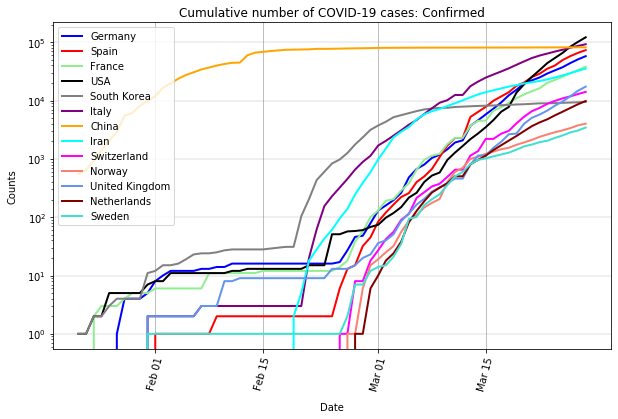

Deaths


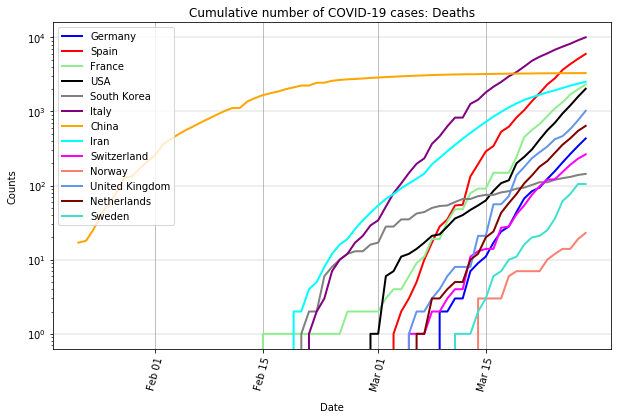

In [10]:
data_path = 'C:/Users/cross-entropy/Documents/github_projects/covid-19/data/'
for df in [df_con, df_die]:
    print(df.name)
    plot_timeseries(df,data_path)

### Corner case, 3/25/2020

In [11]:
# df_con has a new row for West Bank and Gaza confirmed cases, 
#     while df_die does not, because there are not yet any deaths reported for West Bank and Gaza
min_deaths = 15
print(df_die.shape, df_con.shape)
df_con = df_con[df_con[df_con.columns[1]] != 'The West Bank and Gaza']

num = df_die[df_die[df_die.columns[-1]] > min_deaths][df_die.columns[-1]]
den = df_con[df_die[df_die.columns[-1]] > min_deaths][df_con.columns[-1]]
print(len(num))

(253, 71) (253, 71)
42


### Mortality Rate of Confirmed cases

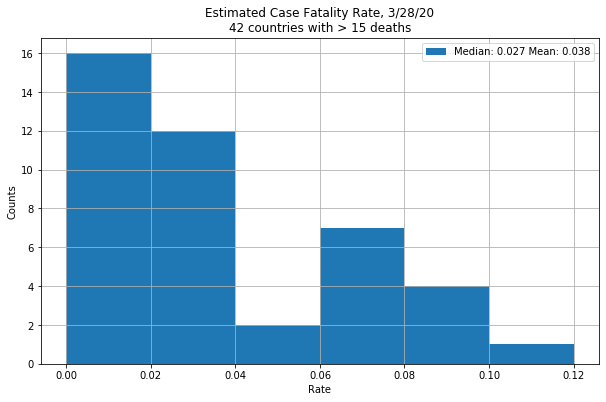

In [12]:
rates = num/den
# bins = [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105]
bins = [0,  0.02,  0.04,  0.06,  0.08,  0.10, 0.12]
fig = plt.figure(figsize=(10,6))
plt.hist(rates,bins = bins)
plt.ylabel("Counts")
plt.xlabel("Rate")
plt.title("Estimated Case Fatality Rate, " + str(df_die.columns[-1]) + "\n" + str(len(rates)) +  " countries with > 15 deaths")
plt.legend(["Median: "+str(round(1000*np.median(rates))/1000)+" Mean: "+str(round(1000*np.mean(rates))/1000)])
plt.grid()

date_label = date_cols[-1].replace('/','-')
png_name = data_path + 'estimated_CFR-'+date_label+'.png'
fig.savefig(png_name)

### Estimates of Case Fatality Rate (CFR)

In [13]:
# Median CFR
print(np.median(rates))
# Mean CFR
print(np.mean(rates))
# Weighted average CFR, weighting by #of deaths
print(sum(rates[num>15]*num[num>15])/sum(num[num>15]))

0.02738130097659236
0.0376998474482047
0.07451723727756839
